<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/2022notebooks/2022_0603Image_segmentation_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- - source: https://www.learnopencv.com/pytorch-for-beginners-semantic-segmentation-using-torchvision/
- date: 2020-0326
--- -->

## セマンティックセグメンテーションとは？
<!-- ## What is Semantic Segmentation?-->

セマンティックセグメンテーションとは画像中の各画素をあるクラスに分類する画像解析課題のこと。
<!-- Semantic Segmentation is an image analysis task in which we classify each pixel in the image into a class. -->

我々人間が常に行っていることと同じで，見ているものを画像と見なすと，画像の各画素がどのクラスに属しているかがわかる。
<!-- Similar to what us humans do all the time by default, when are looking then whatever we are seeing if we think of that as an image then we know what class each pixel of the image belongs to. -->

セマンティック・セグメンテーションはコンピュータでこれを実現するための技術である。
<!-- Essentially, Semantic Segmentation is the technique through which we can achieve this in Computers. -->

セグメンテーションには他にもいくつかの種類がある。
詳しくは [こちら](https://www.learnopencv.com/image-segmentation/)  参照。
ここではセマンティック・セグメンテーションに焦点を当てる。
<!-- There are a few more types of Segmentation, you can read about it more here: https://www.learnopencv.com/image-segmentation/ 
This blog will focus on Semantic Segmentation  -->

例えば次のような画像があるとする。
<!-- So, let's say we have the following image.-->

![](https://lh3.googleusercontent.com/-ELUnFgFJqUU/XPPXOOmhfMI/AAAAAAAAAP0/2cabsTI9uGUYxM3O3w4EOxjR_iJvEQAvACK8BGAs/s374/index3.png)
<small> Source: Pexels </small>

そして上記の画像を意味的に分割した画像は以下のようになる。
<!-- And then given the above image its semantically segmentated image would be the following -->

![](https://lh3.googleusercontent.com/-gdUavPeOxdg/XPPXQngAnvI/AAAAAAAAAQA/yoksBterCGQGt-lv3aX4kfyMUDXTar7yACK8BGAs/s374/index4.png)

このように画像中の各画素はそれぞれのクラスに分類される。
<!-- As you can see, that each pixel in the image is classified to its respective class.-->

これがセマンティック・セグメンテーションの最も簡単な説明である。
<!-- This is in most simple terms what Semantic Segmentation is. -->

## セグメンテーションの応用
<!-- ## Applications of Segmentation -->

セマンティック・セグメンテーションの最も一般的なユースケースは以下の通り。
<!-- The most common use case for the Semantic Segmentation is in: -->

1. 自動運転
<!-- 1. Autonomous Driving -->

<img src="https://cdn-images-1.medium.com/max/1600/1*JKmS08bllQ8SCajIPyiBBQ.png" width="400"/><br/>
<small> Source: CityScapes Dataset </small>
  
自律走行ではカメラから送られてくる画像を意味的に分割し，画像内の各画素をクラスに分類する。
これによりコンピュータは周囲に何があるのかを理解し，それに応じて自動車が行動できるようになる。
<!-- In autonomous driving, the image which comes in from the camera is semantically segmented, thus each pixel in the image is classified into a class. 
This helps the computer understand what is present in the its surroundings and thus helps the car act accordingly. -->

2. 顔セグメンテーション
<!-- 2. Facial Segmentation -->

<img src="https://i.ytimg.com/vi/vrvwfFej_r4/maxresdefault.jpg" width="400"/><br/>
<small> Source: https://github.com/massimomauro/FASSEG-repository/blob/master/papers/multiclass_face_segmentation_ICIP2015.pdf </small>

顔セグメンテーションは，唇や目など，顔の各部分をカテゴリーに分類するために使用されます。
この技術は性別の推定，年齢推定，顔の表情分析，感情分析など，様々な目的で使用される。
<!-- Facial Segmentation is used for segmenting each part of the face into a category, like lips, eyes etc. 
This technique is used for many purposes such as gender estimation, age estimation, facial expression analysis, emotional analysis and more. -->

3. Indoor Object Segmentation
<!-- 3. Indoor Object Segmentation -->

<img src="https://cs.nyu.edu/~silberman/rmrc2014/header_semantic_segmentation.jpg" width="400"/><br/>
<small> Source: http://buildingparser.stanford.edu/dataset.html </small>

どこで使われているのだろうか？
AR (拡張現実) や VR (仮想現実) である。
AR は屋内全体をセグメントして，椅子やテーブル，人，壁，障害物などがどこにあるのかを把握するために必要な応用である。
<!-- Guess where is this used? 
In AR (Augmented Reality) and VR (Virtual Reality). 
AR applications when required segments the entire indoor area to understand where there are chairs, tables, people, wall, and other obstacles and so on. -->

4. ジオ・ランド・センシング
<!-- 4. Geo-Land Sensing -->

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0924271616305305-fx1_lrg.jpg" width="400"/><br/>
<small> Source: https://www.sciencedirect.com/science/article/pii/S0924271616305305 </small>

ジオ・ランド・センシングは衛星画像の各画素をカテゴリに分類し，各領域の土地被覆を追跡する方法である。
例えば，ある地域で森林破壊が進んでいるとすれば，適切な対策を講じることができる。
<!-- Geo Land Sensing is a way of categorizing each pixel in satellite images into a category such that we can track the land cover of each area. 
So, say in some area there is a heavy deforestation taking place then appropriate measures can be taken. -->

## セマンティックセグメンテーションのための torchvision の使用
<!-- ## Using torchvision for Semantic Segmentation-->

さて始める前に，これらのセマンティックセグメンテーションモデルの入力と出力について知っておく必要がある<br/>。
では始めよう。
<!-- Now before we get started, we need to know about the inputs and outputs of these semantic segmentation models.<br/>
So, let's start! -->

これらのモデルは Imagenet の平均と標準偏差で正規化された 3 チャンネル画像を想定している。
<!-- These models expect a 3-channled image which is normalized with the Imagenet mean and standard deviation, i.e., <br/> -->
`mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]`

したがって入力は `[Ni x Ci x Hi x Wi]` となる。
ここで
- `Ni` : バッチサイズ
- `Ci` :  チャンネル数 (3)
- `Hi` :  画像の高さ
- `Wi` :  画像の横幅

<!-- So, the input is `[Ni x Ci x Hi x Wi]`<br/>
where,
- `Ni` -> the batch size
- `Ci` -> the number of channels (which is 3)
- `Hi` -> the height of the image
- `Wi` -> the width of the image -->

そしてモデルの出力は `[No x Co x Ho x Wo]` となる。
ここで
- `No` :  バッチサイズ (`Ni` と同じ)
- `Co`:  **はデータセットが持つクラス数**
- `Ho` :  画像の高さ (ほとんどすべての場合において `Hi` と同じ)
- `Wo` : 画像の幅 (ほとんどの場合 `Wi` と同じ)

<!-- And the output of the model is `[No x Co x Ho x Wo]`<br/>
where,
- `No` -> is the batch size (same as `Ni`)
- `Co` -> **is the number of classes that the dataset have!**
- `Ho` -> the height of the image (which is the same as `Hi` in almost all cases)
- `Wo` -> the width of the image (which is the same as `Wi` in almost all cases) -->

あと，もうひとつ!
Torchvision のモデルは `torch.Tensor` ではなく `OrderedDict` を出力する。
そして `.eval()` モードでは `out` という 1 つのキーを持つだけなので出力を得るにはその `key` に格納されている値を取得する必要がある。

この `OrderedDict` の `out` キーが出力を保持するキーとなる。<br/>
そして，この `out` キーに格納されている値を取得します。
つまり，この `out` キーの値は `[No x Co x Ho x Wo]` という形になっている。

さあ！これで遊ぶ準備ができました :)
<!-- Alright! And just one more thing!
The `torchvision` models outputs an `OrderedDict` and not a `torch.Tensor` <br/>
And in `.eval()` mode it just has one key `out` and thus to get the output we need to get the value
stored in that `key`.

The `out` key of this `OrderedDict` is the key that holds the output. <br/>
So, this `out` key's value has the shape of `[No x Co x Ho x Wo]`.

Now! we are ready to play :) -->

### FCN with Resnet-101 backbone

FCN - Fully Convolutional Netowrks, are among the most early invented Neural Networks for the task of Semantic Segmentation.

Let's load one up!

In [ ]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

これで `Resnet101` をバックボーンに持つ `FCN`（Fully Convolutional Neural Networks の略) の学習済みモデルが完成した :)
<!-- And that's it we have a pretrained model of `FCN` (which stands for Fully Convolutional Neural Networks) with a `Resnet101` backbone :)-->

では画像を取得してみよう
<!-- Now, let's get an image! -->

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('bird.png')
plt.imshow(img)
plt.show()

さて画像ができたので，前処理をして正規化する必要がある! <br/>
前処理として
<!-- Now, that we have the image we need to preprocess it and normalize it! <br/>
So, for the preprocessing steps, we:-->

- 画像を `(256 x 256)` にリサイズする
- 中央だけ切り出して `(224 x 224)` にする
- テンソルに変換 - 画像のすべての値が `[0, 1]` から `[0, 255]` の間になるようにする
-  Imagenet 固有の値で正規化する `mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]` 

<!-- - Resize the image to `(256 x 256)`
- CenterCrop it to `(224 x 224)`
- Convert it to Tensor - all the values in the image becomes between `[0, 1]` from `[0, 255]`
- Normalize it with the Imagenet specific values `mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]` -->

そして最後に `[C x H x W]` から `[1 x C x H x W]` になるように画像の `unsqueeze` を行う。 <br/>
モデルに渡すためにはバッチ次元が必要となる。
<!-- And lastly, we unsqueeze the image so that it becomes `[1 x C x H x W]` from `[C x H x W]` <br/>
We need a batch dimension while passing it to the models. -->

In [ ]:
# Apply the transformations needed
import torchvision.transforms as T
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

上のコードセルが何をするのか見てみよう。</br>
`T.Compose`  は `list` を受け取る関数で，その中の各要素は `transforms` 型である。
この関数はオブジェクトを返すので
このオブジェクトを介して，画像のバッチを渡すと，必要なすべての変換が画像に適用される。
<!-- Let's see what the above code cell does </br>
`T.Compose` is a function that takes in a `list` in which each element is of `transforms` type and </br>
it returns a object through which we can pass batches of images and all the required transforms will be applied to the images.-->

それでは画像に適用された transform を見てみよう。
- `T.Resize(256)` : 画像をサイズ `256 x 256` にリサイズする
- `T.CenterCrop(224)` : 画像を中央切り出し `224 x 224` のサイズにする
- `T.ToTensor()` : 画像を `torch.Tensor` 型に変換し `[0, 1]` の間の値を持つようにする
- `T.Normalize(mean, std)` : 与えられた平均値と標準偏差で画像を正規化する

<!-- - `T.Resize(256)` : Resizes the image to size `256 x 256`
- `T.CenterCrop(224)` : Center Crops the image to have a resulting size of `224 x 224`
- `T.ToTensor()` : Converts the image to type `torch.Tensor` and have values between `[0, 1]`
- `T.Normalize(mean, std)` : Normalizes the image with the given mean and standard deviation. -->

これで画像の前処理が完了した。
では，この画像をモデルに通して `out` キーを取得してみよう。<br/> 
先ほども書いたが画像の出力は以下のようになる。
モデルの出力は `OrderedDict` なので，そこから `out` キーを取得してモデルの出力を得る必要がある。
<!-- Let's take a look at the transforms applied on the images:
Alright! Now that we have the image all preprocessed and ready! Let's pass it through the model and get the `out` key.<br/>
As I said, the output of the model is a `OrderedDict` so, we need to take the `out` key from that to get the output of the model. -->

In [ ]:
# Pass the input through the net
out = fcn(inp)['out']
print (out.shape)

torch.Size([1, 21, 224, 224])


よっしゃー ということで `out` がモデルの最終出力である。
そして，その形状は先ほど説明したように `[1 x 21 x H x W]` となることがわかる。
つまりモデルは「21」のクラスで学習されたので，出力は「21」のチャンネルを持つことになる<br/>

さて，この「21チャンネル」の出力を「2次元」の画像，あるいは「1チャンネル」の画像にする必要がある。

つまり (`[H x W]` 形式の) 2 次元画像は，各画素がクラスラベルに対応し，
この「2次元」画像の各画素 `(x, y)` には、クラスを表す `0 - 20` の数値が対応する。

そして，この `[1 x 21 x H x W]` からどのようにしてそこに到達するのだろうか？<br/> 
それは各画素の最大インデックスを取ることである。
各画素位置の最大インデックスを取り，それがクラスを表する。

<!-- Alright! So, `out` is the final output of the model. 
And as we can see, its shape is `[1 x 21 x H x W]` as discussed earlier. 
So, the model was trained on `21` classes and thus our output have `21` channels!<br/>

Now, what we need to do is make this `21` channeled output into a `2D` image or a `1` channeled image, where each pixel of that image corresponds to a class!

So, the `2D` image, (of shape `[H x W]`) will have each pixel corresponding to a class label, and thus <br/>
for each `(x, y)` in this `2D` image will correspond to a number between `0 - 20` representing a class.

And how do we get there from this `[1 x 21 x H x W]`?<br/>
We take a max index for each pixel position, which represents the class<br/> -->

In [ ]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))

(224, 224)
[0 3]


これで「2次元」画像ができあがりました。
各画素がクラスに対応している。

最後に各画素がクラスラベルに対応するこの `2D` 画像をセグメンテーションマップに変換可視化する。

ここでは以下の関数を用いて， `2D` 画像を `RGB` 画像に変換し各ラベルを対応する色に対応付けることにする。


In [ ]:
plt.imshow(om)

In [ ]:
# Define the helper function
def decode_segmap(image, nc=21):
    label_colors = np.array([(0, 0, 0),  # 0=background
                             # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
                             (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
                             # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
                             (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
                             # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
                             (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
                             # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
                             (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    
    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]
    
    rgb = np.stack([r, g, b], axis=2)
    return rgb

最初の `label_colors` は、インデックスに従って各クラスの色を保存する。
つまり最初のクラスである `background` の色は `label_colors` リストの `0` 番目のインデックスに格納される。
2 番目のクラスである `aeroplane` は `label_colors` のインデックス `1` に格納される。

渡された `2D` 画像から `RGB` 画像を作成することになる。
そこで 3 つのチャンネルすべてに対して空の `2D` 行列を作成する。

つまり `r`, `g`, `b` は最終的な画像の `RGB` チャンネルを形成する配列となる。
また，それぞれは `[H x W]` という形状をしている。
これは渡された `image` の形状である。

ここで  `label_colors` に格納されている各クラスカラーに対してループを実行する。
そしてそのクラスラベルが存在する画像中のインデックスを取得する。(`idx = image == l`)

最後に 3 つの別々のチャンネルを積み重ねて  `RGB` 画像を作成する。
この関数を使って、最終的なセグメント出力を見てみる

In [ ]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

In [ ]:
# def segment(net, path, show_orig=True, dev='cuda'):
def segment(net, path, show_orig=True, dev='cpu'):
    img = Image.open(path)
    if show_orig: 
        plt.imshow(img); 
        plt.axis('off'); 
        plt.show()
    # Comment the Resize and CenterCrop for better inference results
    trf = T.Compose([T.Resize(640), 
                     #T.CenterCrop(224), 
                     T.ToTensor(), 
                     T.Normalize(mean = [0.485, 0.456, 0.406], 
                                 std = [0.229, 0.224, 0.225])])
    inp = trf(img).unsqueeze(0).to(dev)
    out = net.to(dev)(inp)['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    rgb = decode_segmap(om)
    plt.imshow(rgb); plt.axis('off'); plt.show()

別の画像で試してみましょう。

In [ ]:
#!wget -nv https://images.pexels.com/photos/1996333/pexels-photo-1996333.jpeg -O horse.png
segment(fcn, 'people.jpg', dev='cpu')

In [ ]:
#https://medium.com/@danielmechea/what-is-panoptic-segmentation-and-why-you-should-care-7f6c953d2a6a
!wget 'https://miro.medium.com/max/800/1*yEzZr8NxPNSIrZjhMRPg0w.jpeg' -O kitten.jpeg

--2022-06-02 11:41:25--  https://miro.medium.com/max/800/1*yEzZr8NxPNSIrZjhMRPg0w.jpeg
Resolving miro.medium.com (miro.medium.com)... 162.159.153.4, 162.159.152.4
Connecting to miro.medium.com (miro.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61455 (60K) [image/jpeg]
Saving to: ‘kitten.jpeg’

kitten.jpeg         100%[===================>]  60.01K  --.-KB/s    in 0.001s  

2022-06-02 11:41:26 (43.9 MB/s) - ‘kitten.jpeg’ saved [61455/61455]



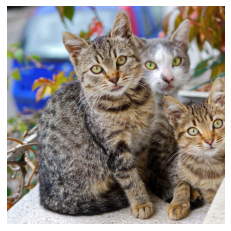

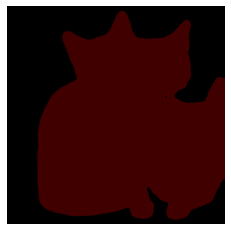

In [ ]:
segment(fcn, 'kitten.jpeg', dev='cpu')

### DeepLabv3

In [ ]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

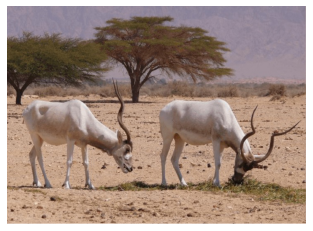

[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


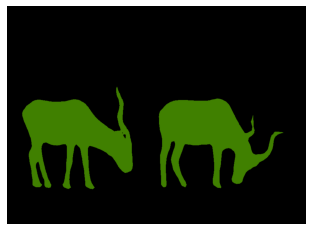

In [ ]:
segment(dlab, 'deer.jpg')

In [ ]:
#!wget https://images.pexels.com/photos/1485799/pexels-photo-1485799.jpeg -O person.jpeg
#!convert person.jpeg person.png

In [ ]:
img = Image.open('person.png')
plt.axis(False)
plt.imshow(img)
plt.show()

In [ ]:
print ('Segmenatation Image on FCN')
segment(fcn, path='./person.png', show_orig=False, dev='cpu')

print ('Segmenatation Image on DeepLabv3')
segment(dlab, path='./person.png', show_orig=False, dev='cpu')

In [ ]:
print ('Segmenatation Image on FCN')
#segment(fcn, path='/Users/asakawa/Pictures/19960222_004.jpg', show_orig=True, dev='cpu')
segment(fcn, path='kitten.jpeg', show_orig=True, dev='cpu')

print ('Segmenatation Image on DeepLabv3')
#segment(dlab, path='/Users/asakawa/Pictures/19960222_004.jpg', show_orig=False, dev='cpu')
segment(dlab, path='kitten.jpeg', show_orig=False, dev='cpu')

なるほど! これでモデルの違いがわかりましたね？

FCN は牛の足の連続性を捉えることができず DeepLabv3 はそれを捉えることができるのがわかりますね!

また牛の上に乗っている人間の手をよく見てみると FCN モデルではきれいに（あまりきれいではありませんが）捉えているのに対して DeepLabv3 モデルではそれほどうまくは捉えていませんね

このように素人目にもわかるようなモデルの違いがいくつかあります。

注：前述したように元画像は前処理でリサイズされ切り取られるため出力画像サイズは元画像より小さくなります。

もっと多くの画像で遊んで、異なるシナリオでこれらのモデルがどのように機能するかを見てください。

<!-- Okay! You can now see the model differences right?

You can see how FCN fails to capture the continuity of the leg of the cow while DeepLabv3 is able to capture that!

Also, if we look closer into the hand of the human which is on the cow, we can see that the FCN model captures it nicely, not very nicely, but still, while the DeepLabv3 model has captured it too but not that well!

These are a few model differences that be noticed with bare eyes!

Note: As we saw before the output image size is smaller than the original image as the original image is resized and cropped in the preprocessing step.

Do play around with a few more images to see how these models perform in different scenarios.! -->